# METR3613: Meteorological Measurements, Dr. Scott Salesky 
## Homework Assignment 4: Analysis and Discussion of PECAN CLAMPS Radiosonde and Doppler Lidar data with Python

***
## Background

Although important, near-surface observations do not provide information about the three-dimensional structure of weather systems. Without this knowledge, a holistic understanding of ongoing atmospheric processes is impossible, and forecasting the evolution of such systems is challenging. It is here where upper air measurements come into play. They allow meteorologists to acquire a fairly complete idea about the three-dimensional structure of a given weather system and of the general conditions in the troposphere. Different approaches are used to derive the three-dimensional characteristics of the troposphere. These include in-situ profiling systems such as radiosondes, dropsondes, and tethersondes, or remote-sensing instruments such as radars, sodars and lidars. Radiosondes are still considered to be the most accurate method to sample the troposphere, but operating a dense radiosonde network is costly and the balloons are typically only released twice daily. Due to these limitations, remote sensing instruments, in particular Doppler wind lidars, have emerged as promising new technologies for obtaining profiles in the atmospheric boundary layer.

A radiosonde is a device that consists of a set of sensors that measure temperature, humidity, and pressure. It also includes a radio antenna to transmit the data to a ground station. There, a radio receiver captures the radio signal and computer programs decipher it into meteorological observations. The radiosonde is sent into the atmosphere attached to a balloon. The balloon needs to be buoyant and is generally inflated using hydrogen or helium. The advantage of radiosondes is that they provide meteorological observations in real time as the balloon ascends. They provide a snapshot of the thermodynamic structure of the troposphere above the station. However, it is important to recognize that the balloon drifts off the exact vertical profile above the station as it is transported laterally by atmospheric winds. Most radiosondes provide information not only while traversing the troposphere, but also while traversing the lowest levels of the stratosphere. The method of retrieving winds evolved with the introduction of radiotheodolites, and another major change occurred with the development of Global Positioning Systems (GPS). GPS provided an opportunity to derive the exact location of the sonde by the addition of a GPS tracking sensor inside the radiosonde. This is now the state-of-the-art of radiosonde technology, and allows for both thermodynamic (temperature, pressure and relative humidity) and dynamic (wind) data to be collected simultaneously. Doppler wind lidars, on the other hand, emit pulses of laser light and measure the backscattered signal received from aerosols moving in the atmosphere. The Doppler shift of the received signal is proportional to the speed of the aerosols moving along the beam of laser light, i.e. the raw velocity data collected by the lidar are radial velocities along different beam directions. By assuming that the aerosols act as passive tracers carried by the wind, the wind profile in the lowest 1-3 km of the atmosphere can be measured. The range depends on the power of the laser and the aerosol density, which is typically much higher below the capping inversion. As described in the lecture notes, different types of scans can be used to retrieve the horizontal wind speed from the lidar radial velocities. The lidar wind speed data used in this homework were retrieved from velocity azimuth display (VAD) scans (see notes from class).

In this homework, you will study the diurnal variations of temperature, wind and moisture at different levels of the atmosphere, and assess the accuracy of the collected data. You will use available atmospheric soundings that were collected during the PECAN experiment during summer 2015. You will receive wind profile data sets collected with a Doppler wind lidar and compare the wind speed measurements between the radiosonde and the Doppler lidar. Additionally, you will also have the opportunity to generate your own datasets by participating in balloon launches during your final lab sessions.

***
### How to use this Notebook
Before you get started, you will have to download this iPython notebook to a folder on your computer where you can edit it. Rename the file as "HW4_LastName_FirstName.ipynb", as this is one of the files you will have to submit for your assignment. 

This iPython notebook has some cells the contain descriptive text, and others that contain Python code, which can be run directly in the web brower. Read the descriptions carefully, as they contain instructions for the assignment, and descriptions of what the code in each cell does. Also pay attention to comments in the Python code (lines that start with "#"), as these contain additional information about what the code does. If you double click a cell, you will be able to edit the contents. If you press Shift + Enter, this will execute the code in the cell. At a number of places in the Notebook, there is text that says **[TRY THIS]** where you can edit the code and explore the output. There are also a number of **Exercises** where you will have to edit / modify the code. New cells can be added by going to the Toolbar, then Cell -> Insert Cell (Above or Below). Homework problems you are expected to complete for this assignment can be found at the end of the notebook.

***
## Data sets provided

Radiosonde observations collected with OU CLAMPS during PECAN on 17 June 2015 near Perry, Nebraska are provided for 5 times: 0100, 0230, 0330, 0430, and 0530 UTC. These files are called `SD_0100.txt`, `SD_0230.txt`, `SD_0330.txt`, `SD_0430.txt`, and `SD_0530.txt`, respectively and are tab delimited text files. An example from `SD_0100.txt` is shown in Fig. 1 below. We will be reading in pressure in milibars (mb), height above ground level (AGL) in meters (m), temperature in Celsius ($^\circ$C), dewpoint temperature in Celsius ($^\circ$C), and horizontal wind speed in meters per second (m s$^{-1}$). Lidar observations are provided for the same 5 times as the radiosonde data and are named similarly except the first letters of the filename are DL instead of SD (e.g., `DL_0100.txt`). An example of Doppler lidar data is shown in Fig. 2 where z is height AGL in meters (m), WS is horizontal wind speed in meters per second (m s$^{-1}$), and column 3 includes the RMS value (m s$^{-1}$) of the lidar wind speed that is estimated from the VAD fits. This RMS value describes the goodness of the lidar VAD sine-wave fits and can be interpreted as a measure of the errors in the lidar WS measurements (i.e. a larger RMS value indicates larger deviations of the raw lidar radial velocities from the fitted sine wave).

<img src="sonde_data_example.png" width=100%></img> | <img src="dl_data_example.png" width=100%></img>
:----: | :----:
**Fig. 1** Format of radiosonde data is shown here. | **Fig. 2** Format of Doppler lidar data is shown here.

***
## Script setup and execution
1. Go to Canvas and download the zip files containing the data for the assignment. Be sure that the data is in the same folder as your IPython Notebook! Otherwise you will have to specify the path to the data directory, as we discussed in previous assignments.
2. Be sure that you have the correct Python packages installed on your machine. In particular, you will need the [MetPy](https://unidata.github.io/MetPy/latest/index.html) package to be able to plot soundings on a Skew-T diagram. This should have been installed with the rest of your Python distribution for the first homework. 

***
## Plotting soundings with MetPy
In this script, we will make use of the MetPy package for Python, which is a collection of tools designed for working with Meteorological data. While it has a lot of functionality, we will primarily use its tools for plotting data on Skew-T Log-P diagrams. For more information abou the package, see the [MetPy documentation](https://unidata.github.io/MetPy/latest/index.html). In particular, there are [examples](https://unidata.github.io/MetPy/latest/examples/Advanced_Sounding.html#sphx-glr-examples-advanced-sounding-py) and [tutorials](https://unidata.github.io/MetPy/latest/tutorials/upperair_soundings.html#sphx-glr-tutorials-upperair-soundings-py) of how to plot upper air soundings. There is also [comprehensive documentation](https://unidata.github.io/MetPy/latest/api/index.html) of all of the functions provided by MetPy and how to call them. 

In addition, Unidata has a 'MetPy Mondays' video series with tutorials on how to use the package. An introductory video for plotting data on Skew-T diagrams is provided below. 

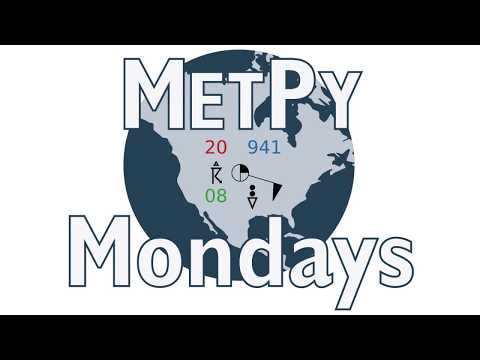

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('oog6_b-844Q')

***
## Reading in data
First we need to define functions to read the text files that contain the Doppler lidar and Numpy data. These are given below:

In [4]:
#Define a function to read Doppler lidar data into Numpy arrays
def dl_import(filename):
    '''
    ---------------------------------------------
    Author: Scott Salesky, University of Oklahoma
    Date: July 12, 2018
    Purpose: Imports Doppler lidar data
    ---------------------------------------------
    Usage: [z,ws,rms] = dl_import(filename)
    '''
    import numpy as np
    
    #Loads data from text file, skipping 1 header lines and removing whitespace.
    #All variables are loaded in string format.
    inputdata = np.genfromtxt(filename,skip_header=1,dtype='float') 
    
    z   = inputdata[:,0]      #Height [m]
    ws  = inputdata[:,1]      #Wind speed [m/s]
    rms = inputdata[:,2]      #r.m.s. wind speed [m/s]
    
    #Returns a list of variables
    print 'Loading',filename
    return [z,ws,rms]

In [5]:
#Define a function to read radiosonde data into Numpy arrays
def sd_import(filename):
    '''
    ---------------------------------------------
    Author: Scott Salesky, University of Oklahoma
    Date: July 12, 2018
    Purpose: Loads radiosonde data into arrays
    ---------------------------------------------
    Usage: [p,z,T,Td,ws] = sd_import(filename)
    '''
    import numpy as np
    
    #Loads data from text file, skipping 1 header lines and removing whitespace.
    #All variables are loaded in string format.
    inputdata = np.genfromtxt(filename,skip_header=1,dtype='float') 
    
    p  = inputdata[:,0]      #Pressure [mb]
    z  = inputdata[:,1]      #Height [m]
    T  = inputdata[:,2]      #Temperature [C]
    Td = inputdata[:,3]      #Dew Point Temperature [C]
    ws = inputdata[:,4]      #Wind speed [m/s]
    
    #Returns a list of variables
    print 'Loading',filename
    return [p,z,T,Td,ws]   

Now let's load the data. First, from the 0230Z radiosonde launch. 

In [6]:
#Load sounding data with function we just defined above...
[p_sd230, z_sd230, T_sd230, Td_sd230, ws_sd230] = sd_import('SD_0230.txt') #0230 sounding
ws_sd230[0] = ws_sd230[1] #Force sfc reading to be same as first sonde reading. Often 999 if we don't have surface data

Loading SD_0230.txt


Load data from the radiosonde launches in class here:

In [10]:
#Add code to load data from METR3613 soundings here





Next, from the 0230Z Doppler lidar profile. 

In [11]:
#Load the CLAMPS DL text files with the dl_import() functions we just defined
[z_dl230,ws_dl230,rms_dl230] = dl_import('DL_0230.txt') #0230 lidar profile

Loading DL_0230.txt


**[TRY THIS]** Modify the code above so that you read in the rest of the PECAN data (from 0100Z, 0330Z, 0430Z, and 0530Z), as well as the sounding data from the balloon launches in class. 

***
## Skew-T plots
This section uses MetPy to create Skew-T diagram plots of the radiosonde data. First we will define a couple of functions that will make it easier for you to plot the sounding data. 

In [16]:
#First we will import the usual Python packages, as well as a few new ones from MetPy. 
import numpy as np                            
%matplotlib inline                            
import matplotlib.pyplot as plt               
from matplotlib import rc                     
from matplotlib.ticker import MultipleLocator 

#Import MetPy and some useful functions
import metpy as mp                             #MetPy
import metpy.calc as mpcalc                    #Calculator for MetPy
from metpy.plots import SkewT                  #Skew-T plots
from metpy.units import units                  #Lets us work with units

Define a function that lets us set up a Skew-T diagram easily.

In [17]:
#Note that the Python function below has optional arguments with default values specified, e.g. Tmin=-35.
#If you want to to change the value of these parameters, you will have to specify Tmin=-40., e.g. in the function call
#However, if you do not include these parameters when you call the function, they will take on their default
#values that are specified below. 
def setup_skewt(Tmin=-35.,Tmax=45.,Psurf=1000.,Pmin=100.,dry_adiabats=True,moist_adiabats=True,mix_ratio=True):
    '''
    ---------------------------------------------
    Author: Scott Salesky, University of Oklahoma
    Date: July 28, 2018
    Purpose: Creates a new Skew-T plot with the specified
    options. 
    ---------------------------------------------
    Usage: [fnum, skew] = setup_skewt(Tmin=Tmin,Tmax=Tmax,psurf=psurf,pmin=pmin,dry_adiabats=True,moist_adiabats=True,mix_ratio=True)
    if you want to specify values for all input parameters. 
    OR: [fnum, skew] = setup_skewt() to use the default values
    Note that you can specify values for just some parameters, for example
    [fnum, skew] = setup_skewt(Tmin=-40. Tmax=50.)
    ---------------------------------------------
    Inputs: Note that all of these arguments are optional. 
             Tmin  -> Minimum value to use for temperature on T-axis (default Tmin = -35. C)
             Tmax  -> Maximum value to use for temperature on T-axis (default Tmax = 40. C)
             Psurf -> Surface pressure (default 1000 mb)
             Pmin  -> Minimum pressure level to plot (default is 100 mb)
             dry_adiabats -> Plot lines for dry adiabats? (default True)
             moist_adiabats -> Plot lines for moist adiabats? (default True)
             mixing_ratio -> Plot lines for mixing ratio? (default True)
    Outputs: fnum  -> Figure handle
             skew  -> SkewT plot instance             
    ''' 
    #Import packages here:
    from metpy.plots import SkewT                  #Skew-T plot
    import metpy as mp                             #MetPy
    import metpy.calc as mpcalc                    #Calculator for MetPy
    from metpy.units import units                  #Lets us work with units
    
    #Create a new figure with figure handle 'fnum'
    fnum=plt.figure(figsize=(4,4),dpi=150,facecolor=None,linewidth=2.0)
    rc('font',weight='normal',size=10,serif='Computer Modern Roman') 
    rc('savefig',dpi=900)   
    
    #Create a SkewT diagram from the figure f1 that we define above. 
    skew=SkewT(fig=fnum,rotation=45) #Rotation defines how far the skewed-T lines are rotated from vertical

    #Set limits for T and P
    skew.ax.set_ylim(Psurf, Pmin)
    skew.ax.set_xlim(Tmin, Tmax)

    #Plot dry adiabats
    if dry_adiabats == True:
        tvals = np.arange(Tmin,180,5)*units.degC        #Dry adiabats every 5 degrees C
        pvals = np.linspace(Psurf,Pmin)*units.mbar
        skew.plot_dry_adiabats(t0=tvals,p=pvals,linestyle='-',lw=0.5,color='grey')
    else:
        pass

    #Plot moist adiabats
    if moist_adiabats == True:
        tvals = np.arange(Tmin,200,5)*units.degC
        pvals = np.linspace(Psurf,Pmin)*units.mbar
        skew.plot_moist_adiabats(t0=tvals,p=pvals,linestyle='--',lw=0.5,color='grey')
    else:
        pass

    #Plot mixing ratio lines
    if mix_ratio == True:
        wvals = [0.1,0.2,0.5,1.0,1.5,2.,3.,4.,6.,8.,10.,12.,15.,20.,30.,35.,40.,45.,50.] #values in g kg^-1
        ww = wvals
        wvals = [1.e-3 * x for x in wvals] #Dimensionless values
        wvals = np.array(wvals).reshape(-1, 1) #Need to reshape so it works with the MetPy function
        pvals = np.linspace(Psurf,Pmin)*units.mbar
        mrl = skew.plot_mixing_lines(w=wvals,p=pvals,lw=0.5,color='green')
    else:
        pass
        
    #Add axis labels
    plt.xlabel('Temperature [C]',fontsize=7)
    plt.ylabel('Pressure [hPa]',fontsize=7)

    #Return figure handle and Skew-T plot instance. 
    return [fnum, skew]

Define another function that makes the grid lines on the Skew-T look nicer. 

In [19]:
def set_skewt_gridlines(skew):
    '''
    Make grid lines for Skew-T diagram look pretty
    This creates grid lines for temperature every 5 degrees C and pressure every 50 mb, with
    bold lines every 10 degrees C and 100 mb
    '''
    #Make tick labels smaller
    skew.ax.tick_params(axis='both',labelsize=7)

    #Major ticks on x-axis (temperature)
    skew.ax.xaxis.set_major_locator(MultipleLocator(10))
    
    #Minor ticks and grid lines for x axis (temperature)
    skew.ax.xaxis.set_minor_locator(MultipleLocator(5))
    skew.ax.grid(color='red',ls='-',lw=0.2,which='major',axis='x')
    skew.ax.grid(color='red',ls='-',lw=0.1,which='minor',axis='x')

    #Minor ticks and grid lines for y axis (pressure)
    skew.ax.yaxis.set_minor_locator(MultipleLocator(50))
    skew.ax.grid(color='blue',ls='-',lw=0.2,which='major',axis='y')
    skew.ax.grid(color='blue',ls='-',lw=0.1,which='minor',axis='y')

Now let's use the functions we just defined to plot the 0230Z sounding. 

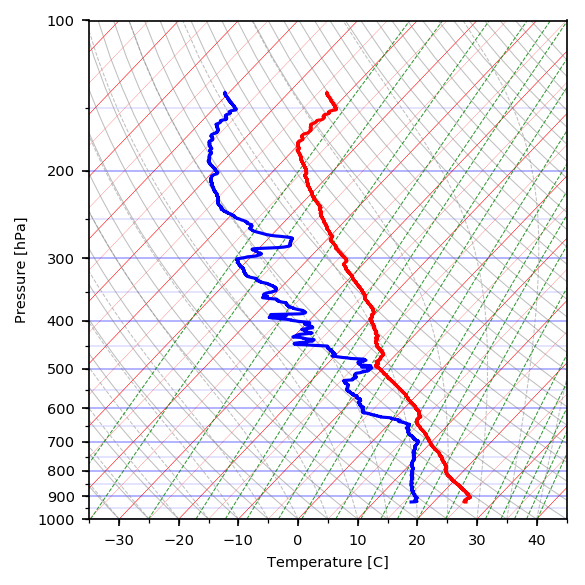

In [23]:
#Setup skew-T diagram
[f1,skew] = setup_skewt()

#Choose sounding to plot
p, T, Td = p_sd230, T_sd230, Td_sd230
    
#Plot T and Td on skewT chart
skew.plot(p,T,'r')
skew.plot(p,Td,'b')

#Set up gridlines
set_skewt_gridlines(skew)

#Students can uncomment the blocks of code below to plot the LCL, 
#parcel profile, CAPE, and CIN

#NOTE: you can uncomment the blocks of code below to calculate and plot 
#1) the LCL 2) the parcel profile 3) the CAPE and CIN

# #1) Plot the LCL
# [lcl_p, lcl_t] = mpcalc.lcl(p[0]*units.mbar, T[0]*units.degC, Td[0]*units.degC)
# skew.plot(lcl_p, lcl_t,'ko',mfc='black',ms=2)

# #2) Plot the parcel profile
# profile = mpcalc.parcel_profile(p*units.mbar, T[0]*units.degC, Td[0]*units.degC).to('degC')
# skew.plot(p, profile, 'k', lw=1)    

# #3) Shade the regions of CAPE and CIN
# skew.shade_cape(p*units.mbar, T*units.degC, profile)
# skew.shade_cin(p*units.mbar, T*units.degC, profile)        

plt.tight_layout()
plt.savefig('sounding_0230z.png',format='png',bbox_inches='tight')
plt.show()

In addition to being able to plot data on a Skew-T diagram, MetPy also has many built-in functions that allow us to do parcel calcualtions. Example calculations that are given below are: 
1. `metpy.calc.lcl`, calculates the lifting condensation level (LCL). [(More info.)](https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.lcl.html#metpy.calc.lcl)
2. `metpy.calc.lfc`, calculates the level of free convection (LFC). [(More info.)](https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.lfc.html#metpy.calc.lfc)
3. `metpy.calc.el`, calculates the equilibrium level (EL). [(More info.)](https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.el.html#metpy.calc.el)
4. `metpy.calc.surface_based_cape_cin`, calculates the surface-based CAPE and CIN. [(More info)](https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.surface_based_cape_cin.html#metpy.calc.surface_based_cape_cin)
5. `metpy.calc.most_unstable_cape_cin`, calculates the most unstable values of CAPE and CIN for this sounding. 
[(More info)](https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.most_unstable_cape_cin.html#metpy.calc.most_unstable_cape_cin)

These functions may be useful to you as you look at the other soundings and try to understand the thermodynamic environment of this 
particular day from the PECAN field experiment. 

In [25]:
#Calculate some additional quantities from the sounding profile, 
#using the built-in MetPy functions

#Note that metpy.calc is imported as mpcalc. 

#Calculate LCL -> This is done above, but repeated here. 
[lcl_p, lcl_t] = mpcalc.lcl(p[0]*units.mbar, T[0]*units.degC, Td[0]*units.degC)
print 'LCL presure: ', lcl_p

#Calculate LFC
[lfc_p,lfc_t] = mpcalc.lfc(p*units.mbar,T*units.degC,Td*units.degC)
print 'LFC pressure', lfc_p

#Calculate EL
[el_p,el_t] = mpcalc.el(p*units.mbar,T*units.degC,Td*units.degC)
print 'EL pressure', el_p

#Calculate surface based CAPE and CIN
[surf_cape,surf_cin] = mpcalc.surface_based_cape_cin(p*units.mbar,T*units.degC,Td*units.degC)
print 'Surface-based CAPE', surf_cape
print 'Surface-based CIN', surf_cin

#Calculate most unstable CAPE and CIN
[mu_cape,mu_cin] = mpcalc.most_unstable_cape_cin(p*units.mbar,T*units.degC,Td*units.degC)
print 'Most unstable CAPE', mu_cape
print 'Most unstable CIN', mu_cin

LCL presure:  807.240109139 millibar
LFC pressure 663.735216062 millibar
EL pressure 237.973776667 millibar
Surface-based CAPE 705.010821382 joule / kilogram
Surface-based CIN -197.164589265 joule / kilogram
Most unstable CAPE 1271.06329711 joule / kilogram
Most unstable CIN -83.4017849514 joule / kilogram


***
## Calculations
To calculate the bias between wind observations, we need to compare the observations as a function of height. However, our observing platforms do not have the same vertical resolution. If we are going to compare measurements at the same height, we need to make sure our datasets have the same z-axis. We do this through interpolation, by using the `interp1d` function from SciPy. We first create an interpolant: `g=interp1d(z_dl, ws_dl, kind='linear')`, then we interpolate the wind speed to new z-axis (common to both the radiosonde and Doppler lidar) by calling the interpolant: `ws_new = g(znew)`.

More information on the [interp1d function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) can be found from the SciPy documentation. 

**[TRY THIS]** Add code below to do the interpolation for the other datasets. 

In [28]:
#Load the interpolate function from SciPy
from scipy.interpolate import interp1d

#Define a new array of z we can use as a common axis for interpolating both the lidar and the radiosonde data
znew = np.arange(60,2000+20,20) #Array from 60 to 2000, with a 20 m increment. 
#print 'znew=',znew

#Interpolate to new spacing. Here we use the SciPy interp1d function. 

#First interpolate the Doppler lidar data. 
#Create a linear interpolant 
g = interp1d(z_dl230, ws_dl230, kind='linear') #0230Z lidar
#Get a linearly interpolated value of windspeed at the locations specified by znew. 
ws_dl230_new = g(znew)

#Do the same thing for the sounding data. 
g = interp1d(z_sd230, ws_sd230, kind='linear') #0230Z sounding
ws_sd230_new = g(znew)

Now we will caculate the bias between the sonde and the lidar. 

In [30]:
#Now calculate the wind speed bias. 
ws_bias230 = np.abs(ws_dl230_new - ws_sd230_new)
#Do this calculation for your other datasets. 

***
## Vertical wind profile plots
Now we will make plots of the vertical wind speed from the Doppler lidar and sounding data, as well as the bias between the two. 

Here you should plot wind speed on the x-axis and height on the y-axis. Be sure to modify your axis limits to most appropriately show your data. You may want to plot the data without limits first to see what limits you should use. The commands `plt.xlim([xmin,xmax])` and `plt.ylim([ymin,ymax])` set the limits on the x- and y-axis. 

Something to keep in mind: this figure has subplot. Consider how your axes should look compared to one another. Is it misleading to show a profile with an x-axis from 0-10 m s$^{-1}$ compared to a profile with an x-axis from 0-30 m s$^{-1}$?

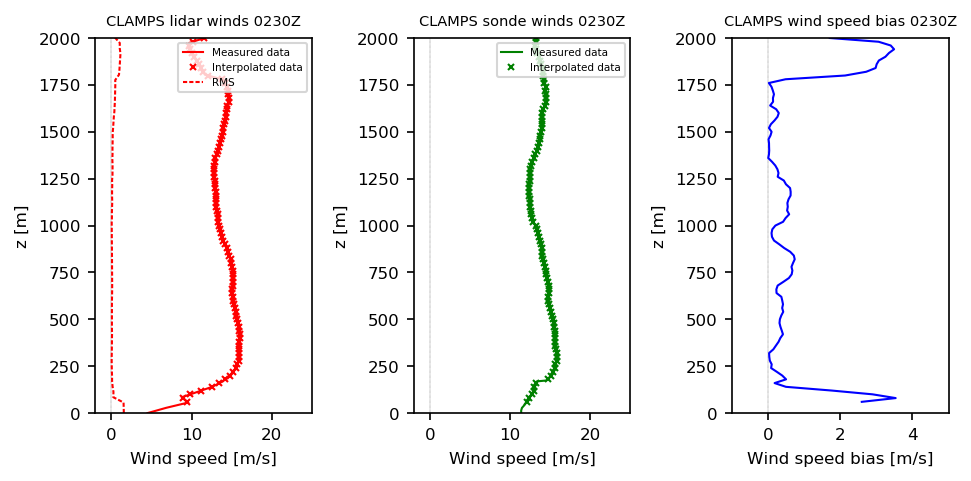

In [31]:
#Create a new figure
plt.figure(figsize=(6.5,3.25),dpi=150,facecolor=None,linewidth=2.0)
rc('font',weight='normal',size=8,serif='Computer Modern Roman') 
rc('savefig',dpi=900)  

#Doppler lidar winds
plt.subplot(1,3,1)
plt.plot(ws_dl230,z_dl230,'r-',lw=1,label='Measured data')
plt.plot(ws_dl230_new,znew,ls='None',marker='x',mec='r',ms=3,label='Interpolated data')
plt.plot(rms_dl230,z_dl230,'r--',lw=1,dashes=(2,1),label='RMS')
plt.ylim([0,2000])
plt.xlim([-2,25])
plt.xlabel('Wind speed [m/s]')
plt.ylabel('z [m]')
plt.legend(loc='upper right',frameon='None',fontsize=5)
plt.title('CLAMPS lidar winds 0230Z',fontsize=7)
plt.axvline(lw=0.2,color='k',zorder=0,dashes=(1,1))

#Sonde winds
plt.subplot(1,3,2)
plt.plot(ws_sd230,z_sd230,'g-',lw=1,label='Measured data')
plt.plot(ws_sd230_new,znew,ls='None',marker='x',mec='g',ms=3,label='Interpolated data')
plt.ylim([0,2000])
plt.xlim([-2,25])
plt.xlabel('Wind speed [m/s]')
plt.ylabel('z [m]')
plt.legend(loc='upper right',frameon='None',fontsize=5)
plt.title('CLAMPS sonde winds 0230Z',fontsize=7)
plt.axvline(lw=0.2,color='k',zorder=0,dashes=(1,1))

#Wind observation bias
plt.subplot(1,3,3)
plt.plot(ws_bias230,znew,'b-',lw=1)
plt.ylim([0,2000])
plt.xlim([-1,5])
plt.xlabel('Wind speed bias [m/s]')
plt.ylabel('z [m]')
plt.title('CLAMPS wind speed bias 0230Z',fontsize=7)
plt.axvline(lw=0.2,color='k',zorder=0,dashes=(1,1))

plt.tight_layout()
plt.savefig('wind_comparison_0230z.png',format='png',bbox_inches='tight')
plt.show()

***
## Tasks
### Tasks related to the PECAN data sets are:
1. Plot Skew-T Log-P diagrams for the 0100, 0330, 0430, and 0530 UTC data analogous to the example plots for 0230 UTC that are already generated by the starter script. To do this, you can simply add the import and plotting commands for the additional sondes to your script. 
2. For each sounding, indicate any data you believe may be impacted by an error. Justify your indication(s) with a description of the errors and suggest sources of the errors. 
3. Using all soundings, write a brief description of the meteorological environment. You may find the MetPy functions to derive sounding parameters (LCL, LFC, EL, CAPE, CIN) given above to be helpful. Discuss what the observed environment indicates about the weather in this area. 
4. Interpolate the radiosonde and lidar observed winds at 0100, 0330, 0430, and 0530 UTC to a similar $z$ axis. An example interpolation is given above. The comments in the code should allow you to figure out where in the script these operations are done. 
5. Calculate the bias between the 2 wind observing platforms at each height. Bias is defined as a function of $z$ as shown in the equation below. Do this for 0100, 0330, 0430, and 0530 UTC. Biases at 0230 UTC are calculated in the code above as an example.  
\begin{equation}
\text{Bias}(z) = \lvert \text{Lidar wind}(z) - \text{Sonde wind}(z) \rvert
\end{equation}
6. A pair of vertical wind profiles has been generated in this starter script. The 0230 UTC plot has 3 panels: lidar observed winds, sonde observed winds, and the bias between these two measurements. Create similar plots for 0100, 0330, 0430, and 0530 UTC. Pay attention to your axes. Be sure they make sense and are consistent for comparison purposes. 
7. Discuss the differences in the wind measurements. Is the error varying in time? How does the error change with height? What could be causing the discrepancies between the observing systems? Hint: discuss the RMS in the lidar VAD fit and the bias together. How do they compare? 
8. If you were using this data as a part of a research project, which data would you use? Would you combine them? If so, how would you do this? This discussion is application-dependent, so be sure to discuss the reasoning that led you to your choice. 

### Tasks related to the data from your balloon releases are: 
1. Using the plotting functions provided in this script as an example, plot a *single panel plot* of the wind profile observed by the sonde you released in the lab. Hint: one of the subplots in the wind profile plots should work, but make it a standalone plot. 
2. Plot a Skew-T Log-P diagram using data from the balloon release you participated in during lab. Write a brief discussion of the environment you sampled. What does this tell you about that day's weather? Do you seen any errors in your data? If so, what are they, and what could be their sources? 
3. Submit your iPython notebook as a `.ipynb` file, named `HW4_LastName_FirstName.ipynb` **and** your write-up (including all figures!) as a Word or pdf file to the Dropbox folder on Canvas. **Submissions where the `.ipynb` file is missing are not acceptable (because without the code, we have no way of verifying how you produced the plots) and will be graded as a missing assignment (0 points).**